<a href="https://colab.research.google.com/github/Jose-Gabriel-Rodriguez/MachineLearning/blob/main/Unidad4/Practica_3_PCA_Lending_Club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image](https://github.com/JoseGabriel-ITD/Probabilidad-y-Estadistica/blob/main/Cintilla2004.png?raw=true)

# **Machine Learning y Deep Learning**

## Unidad 4

### Practica 3: **Análisis de Componentes Principales (PCA)**

### Facilitador: *Dr. José Gabriel Rodríguez Rivas*

### Alumno:  _____________


## **Análisis de Componentes Principales (PCA)**



### **Reducción de Dimensionalidad mediante PCA**

La **Reducción de Dimensionalidad mediante PCA** (Análisis de Componentes Principales) puede ser útil para **simplificar los datos** en el dataset lending_club_2007_2011_6_states **al extraer las características más importantes o reducir la redundancia entre variables**.

- Transformar un conjunto de variables posiblemente correlacionadas en un **conjunto más pequeño de variables** no correlacionadas llamadas componentes principales.
- Este proceso **ayuda a reducir la complejidad de los datos** mientras se preserva la mayor cantidad posible de información relevante.
- Primero, se debe asegurar que los datos estén escalados y normalizados. Esto se debe a que el PCA es sensible a las escalas de las variables.

**Ejemplo práctico:**
Supongamos que tenemos un conjunto de datos con 4 características: altura, peso, edad y nivel de actividad física. Usando PCA, podrías transformar estas 4 características en 2 componentes principales:
- Componente 1 (PC1): Podría estar influido principalmente por altura y peso, explicando el 70% de la varianza.
- Componente 2 (PC2): Podría estar más relacionado con la edad y el nivel de actividad física, explicando el 20% de la varianza.
- En este caso, el PCA redujo 4 dimensiones a 2, conservando el 90% de la información total.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [4]:
# Cargar el dataset
prestamos = pd.read_csv("prestamos_ok.csv")
# Exploración rápida
prestamos.head()

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,issue_year,repaid,loan_term_year,purpose_code,home_ownership_code,grade_code,addr_state_code
0,0,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,Cash,N,NaN,2011,1,3,11,4,2,2
1,1,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,Cash,N,NaN,2011,1,3,9,4,2,0
2,2,3000,3000,3000.0,36 months,18.64,109.43,E,E1,MKC Accounting,...,Cash,N,NaN,2011,1,3,0,4,4,0
3,3,5600,5600,5600.0,60 months,21.28,152.39,F,F2,NaN,...,Cash,N,NaN,2011,0,5,11,3,5,0
4,4,5375,5375,5350.0,60 months,12.69,121.45,B,B5,Starbucks,...,Cash,N,NaN,2011,0,5,9,4,1,5


In [5]:
model_columns = ['funded_amnt', "int_rate", "grade_code", 'purpose_code',
                 'addr_state_code',
                 'home_ownership_code', 'annual_inc', 'dti', 'revol_util',
                 'pub_rec_bankruptcies']

X = prestamos[model_columns]
X.head()

,funded_amnt,int_rate,grade_code,purpose_code,addr_state_code,home_ownership_code,annual_inc,dti,revol_util,pub_rec_bankruptcies
0,2400,15.96,2,11,2,4,12252.0,8.72,98.5,0.0
1,10000,13.49,2,9,0,4,49200.0,20.00,21.0,0.0
2,3000,18.64,4,0,0,4,48000.0,5.35,87.5,0.0
3,5600,21.28,5,11,0,3,40000.0,5.55,32.6,0.0
4,5375,12.69,1,9,5,4,15000.0,18.08,36.5,0.0


In [6]:
y = prestamos['repaid']
y.head()

,repaid
0,1
1,1
2,1
3,0
4,0


## **Escalar los datos**

In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.20758742,  1.04653339,  0.28771526, ..., -0.6435994 ,
         1.74122331, -0.19676047],
       [-0.14851581,  0.37863978,  0.28771526, ...,  1.04920704,
        -1.00854161, -0.19676047],
       [-1.1239765 ,  1.77121147,  1.72995   , ..., -1.14934033,
         1.3509341 , -0.19676047],
       ...,
       [ 1.94175711, -0.4055268 ,  0.28771526, ..., -1.34443327,
        -0.92693568, -0.19676047],
       [-1.1239765 , -0.4893515 ,  0.28771526, ..., -1.95222282,
        -1.7536392 , -0.19676047],
       [-0.84527345, -0.57588023, -0.43340212, ..., -0.74714873,
        -0.02927049, -0.19676047]])

## **Aplicar PCA**

In [27]:
# Inicializar PCA y especificar el número de componentes principales deseados
pca = PCA(n_components=2)  # Elegimos 2 componentes para visualización
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))


Proporción de varianza explicada por cada componente: [0.24515346 0.14414767]
Varianza explicada acumulada: [0.24515346 0.38930113]


### **Interpretación:**

- **El primer componente principal (PC1)** explica aproximadamente el **24.52%** de la variabilidad total de los datos. Esto significa que casi una cuarta parte de la información en las variables originales puede representarse mediante este componente.
- **El segundo componente principal (PC2**) explica alrededor del **14.41%** de la variabilidad total. Este segundo componente captura información adicional no explicada por el primero, pero en menor medida.
- **Los 2 componentes explican apenas el 38.93% de la variabilidad** de la informacion, por lo tanto, no es suficiente y es necesario especificar más componentes.

### **Realizar PCA y Especificar 6 componentes**

In [20]:
# Inicializar PCA y especificar el número de componentes principales deseados
pca = PCA(n_components=6)  # Elegimos 6 componentes
X_pca = pca.fit_transform(X_scaled)

# Mostrar la proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:", explained_variance)
print("Varianza explicada acumulada:", np.cumsum(explained_variance))

Proporción de varianza explicada por cada componente: [0.24515346 0.14414767 0.11874062 0.10357263 0.09809103 0.0849997 ]
Varianza explicada acumulada: [0.24515346 0.38930113 0.50804175 0.61161438 0.70970541 0.79470511]


### **Interpretacion**
 - **La Varianza acumulada de los 6 componentes es del 79.47%**.
 - El resto de la información (20.53%) está distribuida entre los componentes restantes.
 - Se puede **trabajar con los primeros 6 componentes** para reducir significativamente la dimensionalidad de los datos, **conservando cerca del 80% de la información original**.
 - Decidir cuántos componentes mantener depende del umbral de varianza acumulada que consideres suficiente, por ejmplo, Si el objetivo es conservar al menos el 90%, necesitariamos más componentes.
 -  **Cada componente principal es una combinación lineal de las variables originales, y los coeficientes asociados a estas variables**.
 -  Cada componente principal (PC1)es una suma ponderada de las variables originales (PC1 = aiX1, a2X2, a3X3.... anXn
 -  a1, a2, a3... an son los coeficientes o pesos que determinan cuánto contribuye cada variable x1, x2, x3 .. xn
 -  **El orden en el que aparecen las variables en el dataset no define directamente la estructura de los componentes**.

## **Coeficientes de las variables**

* Los coeficientes sirven para interpretar completamente los componentes principales y entender qué mide cada uno.

In [21]:
# Coeficientes de las variables
componentes = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("Contribución de variables a cada componente:")
print(componentes)

Contribución de variables a cada componente:
     funded_amnt  int_rate  grade_code  purpose_code  addr_state_code  \
PC1     0.275325  0.594051    0.587323     -0.092401        -0.012857   
PC2     0.477991 -0.003866    0.002497      0.012610         0.121172   
PC3    -0.184058  0.224520    0.236094      0.683643         0.007311   
PC4    -0.054121 -0.036455   -0.037865     -0.130418        -0.674160   
PC5    -0.126316  0.000858    0.002358      0.069276         0.667664   
PC6    -0.079805 -0.022957   -0.021654      0.609551        -0.264485   

     home_ownership_code  annual_inc       dti  revol_util  \
PC1             0.032429    0.068504  0.171456    0.423147   
PC2            -0.523011    0.584807 -0.286579   -0.230418   
PC3             0.216291   -0.003909 -0.557050   -0.173886   
PC4            -0.102736    0.129479 -0.146171    0.040684   
PC5            -0.245145   -0.103839  0.127669    0.004236   
PC6            -0.514556   -0.079609  0.506933    0.101829   

     pub

### **Interpretación**

#### **PC1 (Componente Principal 1)**
Este componente representa un eje fuertemente asociado al Nivel de riesgo crediticio del préstamo. Variables ordenadas de acuerdo al peso de la variable.

| Variable        | Valor    |
| --------------- | -------- |
| **int_rate**    | **0.59** |
| **grade_code**  | **0.58** |
| **revol_util**  | **0.42** |
| **funded_amnt** | **0.27** |
| **dti**         | **0.17** |


#### **PC2 (Componente Principal 2)**

Este componente representa un eje de Capacidad económica y estabilidad del prestatario.
| Variable           | Valor     |
| ------------------ | --------- |
| **annual_inc**     | **0.58**  |
| **funded_amnt**    | **0.48**  |
| **dti**            | **-0.28** |
| **home_ownership** | **-0.52** |

*PC2 es un eje de solvencia / poder adquisitivo.*

#### **PC3 (Componente Principal 3)**

Este componente combina el propósito del préstamo (education, small_business, medical, etc.)

| Variable         | Valor     |
| ---------------- | --------- |
| **purpose_code** | **0.68**  |
| **grade_code**   | **0.23**  |
| **int_rate**     | **0.22**  |
| **dti**          | **-0.55** |


#### **PC4 (Componente Principal 4)**
Este componente junta variación geográfica + riesgo legal (Historial de quiebras públicas).

| Variable            | Valor     |
| ------------------- | --------- |
| **pub_rec_bank**    | **0.68**  |
| **addr_state_code** | **-0.67** |


#### **PC5 (Componente Principal 5)**

* Muy parecido a PC4 pero invertido en signos, lo cual significa:  
* PC4 y PC5 capturan juntos el bloque geográfico / legal.  

| Variable            | Valor    |
| ------------------- | -------- |
| **addr_state_code** | **0.66** |
| **pub_rec_bank**    | **0.66** |


#### **PC6 (Componente Principal 6)**
Este componente representa patrones relacionados al propósito del crédito y estructura de tenencia del hogar.
| Variable                | Valor     |
| ----------------------- | --------- |
| **purpose_code**        | **0.60**  |
| **dti**                 | **0.50**  |
| **home_ownership_code** | **-0.51** |





### **Gráfica del codo (Scree Plot).**

* Graficar la varianza explicada de cada componente.
* Escoger los componentes antes del “codo”.
* El “codo” se identifica donde la pendiente cambia drásticamente, es decir, donde agregar más componentes ya no aporta información significativa.

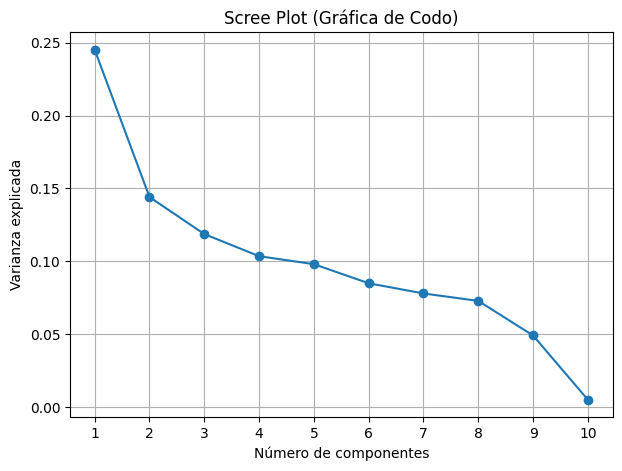

Varianza por componente: [0.24515346 0.14414767 0.11874062 0.10357263 0.09809103 0.0849997
 0.07801901 0.072922   0.04920523 0.00514865]
Varianza acumulada: [0.24515346 0.38930113 0.50804175 0.61161438 0.70970541 0.79470511
 0.87272412 0.94564612 0.99485135 1.        ]


In [22]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(7,5))
plt.plot(
    range(1, len(pca_full.explained_variance_ratio_) + 1),
    pca_full.explained_variance_ratio_,
    marker='o'
)
plt.xticks(range(1, len(pca_full.explained_variance_ratio_) + 1))
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.title("Scree Plot (Gráfica de Codo)")
plt.grid(True)
plt.show()

print("Varianza por componente:", pca_full.explained_variance_ratio_)
print("Varianza acumulada:", pca_full.explained_variance_ratio_.cumsum())



### **Interpretación**
* Eje X (Número de componentes): Representa los componentes principales (PC1, PC2, …, PC10).
* Eje Y (Varianza explicada): Indica qué proporción de la variabilidad total del dataset explica cada componente.
* Patrón observado:
  * El primer componente explica aproximadamente 24-25% de la varianza.
  * El segundo componente baja a ~14%.
  * A partir del tercer componente, la varianza explicada disminuye gradualmente (entre 12% y 5%).
  * Después del quinto componente, la ganancia marginal es muy pequeña (menos del 10% cada uno).  

**¿Dónde está el “codo”?**

* El “codo” se observa alrededor del componente 3 o 4, donde la curva deja de caer abruptamente y se aplana.
* Esto indica que 3 o 4 componentes capturan la mayor parte de la información relevante, y agregar más componentes aporta poca mejora.  

**Conclusión para Lending Club**
* Reducir a 3-4 componentes es razonable, porque:
  * Se captura aproximadamente 50-60% de la varianza total.
  * Evitas sobrecargar el modelo con dimensiones que aportan poca información.
* Si el objetivo es visualización, usar 2 componentes puede ser suficiente.
* Si el objetivo es modelado predictivo, usar 3-4 componentes es mejor para balancear simplicidad y retención de información.

---------------

## **Gráfico Biplot**

* El gráfico de Biplot, representa a las observaciones proyectadas en los componentes principales (por ejemplo PC1 y PC2).
* Sirven para ver:
  * similitudes entre datos
  * agrupamientos
  * separaciones naturales  

**Considerar que:**
* NO se puede hacer un biplot con 6 componentes.
* Si usáramos 6 componentes necesitaríamos un espacio de 6 dimensiones para graficarlos… lo cual no se puede visualizar en 2D o 3D de manera directa.
* Podemos hacer múltiples biplots, por ejemplo:
  * PC1 vs PC2
  * PC3 vs PC4

**Que información obtenemos con un Biplot?**
* Si los vectores son largos → variables con alta varianza, aportan mucho al PCA.
* Si dos vectores están cerca → variables correlacionadas.
* Si un punto cae en la dirección de una flecha → esa observación tiene un valor alto en esa variable.
* Si un punto cae en dirección opuesta → valor bajo en esa variable.
* Variables muy correlacionadas → flechas apuntan casi al mismo lugar.

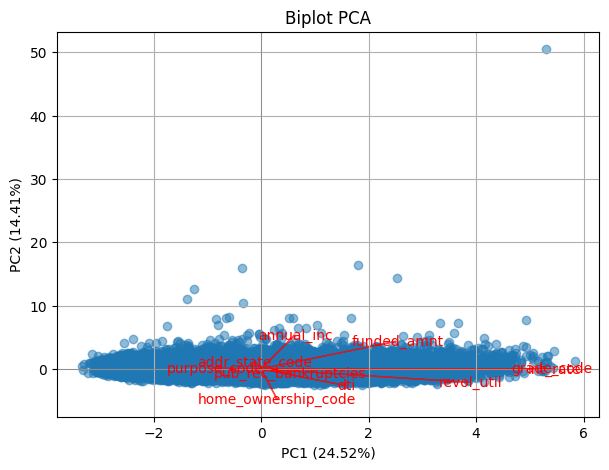

In [45]:
pca = PCA(n_components=6)  # Definimos el PCA con 6 componentes
components = pca.fit_transform(X_scaled)   # Calcular el PCA

# Componentes
PC1 = components[:, 0]
PC2 = components[:, 1]
PC3 = components[:, 2]
PC4 = components[:, 3]
PC5 = components[:, 4]
PC6 = components[:, 5]

loadings = pca.components_.T    # loadings (vectores)
variables = X.columns   # Guarda los nombres de las variables originales,

plt.figure(figsize=(7,5))

# Graficar puntos (scores)
plt.scatter(PC1, PC2, alpha=0.5)

# Etiquetas de ejes
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

# Graficar vectores (loadings)
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              loadings[i,0]*9,   #  multiplicador para mejorar visualización
              loadings[i,1]*9,
              color='red',
              alpha=0.7,
              head_width=0.05)

    plt.text(loadings[i,0]*9.2,
             loadings[i,1]*9.2,
             var, color='red', ha='center', va='center')

plt.title("Biplot PCA")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()

### **Interpretación**

El problema del rango en el eje Y se debe a que algunos puntos tienen valores extremos (outliers), lo que estira la escala y hace que la mayoría de los puntos queden aplastados cerca de cero.

## **Mejorar Apariencia**
* Para mejorar la apariencia **limitamos el rango de Valores en el eje y**, aunque esto signifique dejar fuera los valores muy grandes o atípicos
* Usamos: plt.ylim(-10, 20)  

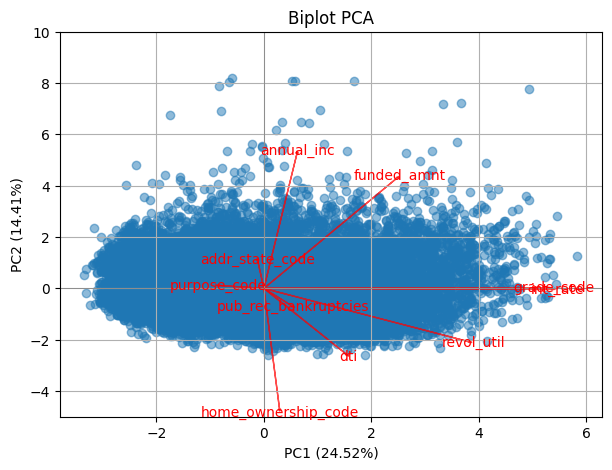

In [52]:
pca = PCA(n_components=6)  # Definimos el PCA con 6 componentes
components = pca.fit_transform(X_scaled)   # Calcular el PCA

# Componentes
PC1 = components[:, 0]
PC2 = components[:, 1]
PC3 = components[:, 2]
PC4 = components[:, 3]
PC5 = components[:, 4]
PC6 = components[:, 5]

loadings = pca.components_.T    # loadings (vectores)
variables = X.columns   # Guarda los nombres de las variables originales,

plt.figure(figsize=(7,5))

# Graficar puntos (scores)
plt.scatter(PC1, PC2, alpha=0.5)

# Etiquetas de ejes
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")

plt.ylim(-5, 10)  # Ajustar

# Graficar vectores (loadings)
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              loadings[i,0]*9,   #  multiplicador para mejorar visualización
              loadings[i,1]*9,
              color='red',
              alpha=0.7,
              head_width=0.05)

    plt.text(loadings[i,0]*9.2,
             loadings[i,1]*9.2,
             var, color='red', ha='center', va='center')

plt.title("Biplot PCA")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()

## **Biplot de componentes PC3 y PC4**

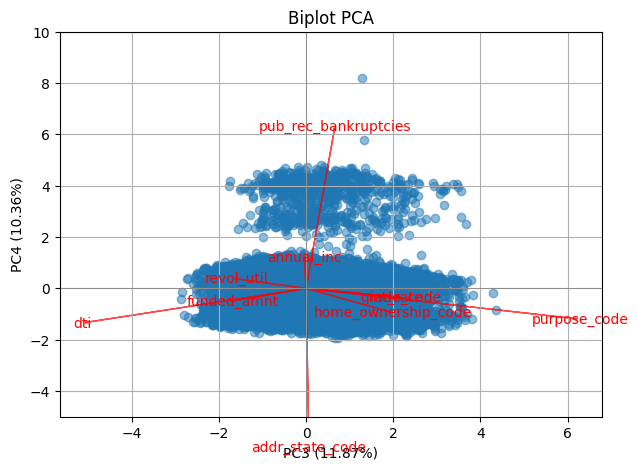

In [59]:
pca = PCA(n_components=6)  # Definimos el PCA con 6 componentes
components = pca.fit_transform(X_scaled)   # Calcular el PCA

# Componentes
PC1 = components[:, 0]
PC2 = components[:, 1]
PC3 = components[:, 2]
PC4 = components[:, 3]
PC5 = components[:, 4]
PC6 = components[:, 5]

loadings = pca.components_.T    # loadings (vectores)
variables = X.columns   # Guarda los nombres de las variables originales,

plt.figure(figsize=(7,5))

# Graficar puntos (scores)
plt.scatter(PC3, PC4, alpha=0.5 )

# Etiquetas de ejes
plt.xlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
plt.ylabel(f"PC4 ({pca.explained_variance_ratio_[3]*100:.2f}%)")

plt.ylim(-5, 10)  # Ajustar

# Graficar vectores (loadings)
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              loadings[i,2]*9,   #  multiplicador para mejorar visualización
              loadings[i,3]*9,
              color='red',
              alpha=0.7,
              head_width=0.05)

    plt.text(loadings[i,2]*9.2,
             loadings[i,3]*9.2,
             var, color='red', ha='center', va='center')

plt.title("Biplot PCA")
plt.grid(True)
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.show()